In [11]:
# ============================================
# LABORATORIO 7 - PUNTO 1
# Dataset Aleatorio con Blobs
# K-Means, Método del Codo y Silhouette Score
# ============================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter
import random



In [12]:
# ============================================
# GENERADOR DE DATASET ALEATORIO MODIFICADO
# ============================================
print("="*70)
print("GENERADOR DE DATASET ALEATORIO")
print("="*70)

def generate_blobs(k, n_samples=2000, min_distance=2.0, random_state=42):
    """
    Genera dataset con k centroides (1-20) con distancia mínima entre ellos.

    Parámetros:
    - k: número de clusters (1 <= k <= 20)
    - n_samples: total de muestras
    - min_distance: distancia mínima entre centroides
    - random_state: semilla aleatoria

    Retorna: X (datos), y (etiquetas), centers (centroides verdaderos)
    """
    if k < 1 or k > 20:
        raise ValueError("k debe estar entre 1 y 20")

    np.random.seed(random_state)

    # Generar centroides con distancia mínima
    attempts = 0
    while attempts < 100:
        centers = np.random.uniform(-5, 5, (k, 2))
        if k == 1:
            break
        # Calcular distancia mínima entre centroides
        min_dist = min([np.linalg.norm(centers[i] - centers[j])
                       for i in range(k) for j in range(i+1, k)])
        if min_dist >= min_distance:
            break
        attempts += 1

    if attempts == 100:
        print(f"Advertencia: No se logró distancia mínima exacta para k={k}")

    # Desviación estándar para blobs visibles
    blob_std = np.full(k, 0.7)

    X, y = make_blobs(n_samples=n_samples, centers=centers,
                     cluster_std=blob_std, random_state=random_state)

    return X, y, centers

# Generar K aleatorio entre 1 y 20
k_true = random.randint(1, 20)
print(f"\nGenerando dataset con k={k_true} centroides verdaderos")
print(f"Distancia mínima entre centroides: 2.0")

X, y_true, true_centers = generate_blobs(k_true)

print(f"\nDataset generado:")
print(f"  - Muestras: {X.shape[0]}")
print(f"  - Características: {X.shape[1]}")
print(f"  - Centroides verdaderos: {k_true}")



GENERADOR DE DATASET ALEATORIO

Generando dataset con k=3 centroides verdaderos
Distancia mínima entre centroides: 2.0

Dataset generado:
  - Muestras: 2000
  - Características: 2
  - Centroides verdaderos: 3


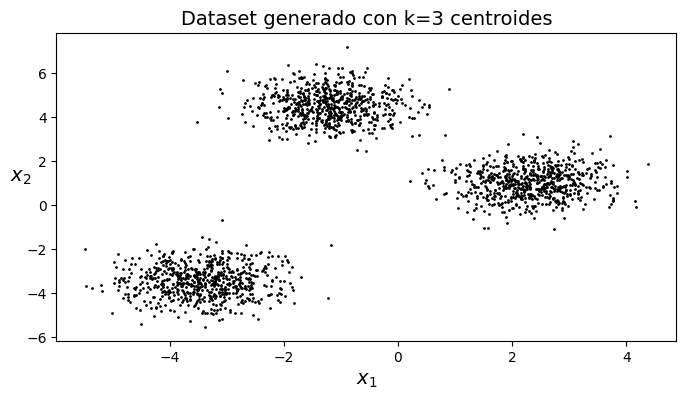

In [13]:
# ============================================
# FUNCIONES DE VISUALIZACIÓN
# ============================================
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

# Visualizar datos generados
plt.figure(figsize=(8, 4))
plot_data(X)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.title(f"Dataset generado con k={k_true} centroides", fontsize=14)
plt.show()





DEMOSTRACIÓN DE K-MEANS

K para demostración: 4


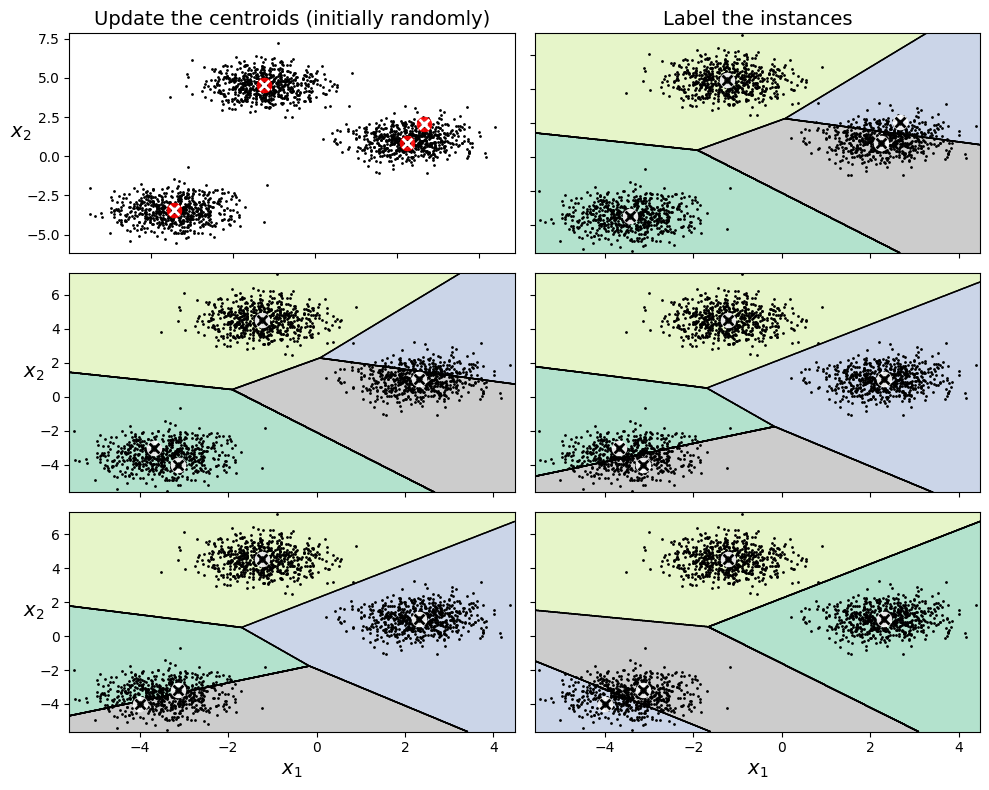

In [14]:
# ============================================
# DEMOSTRACIÓN DE K-MEANS
# ============================================
print("\n" + "="*70)
print("DEMOSTRACIÓN DE K-MEANS")
print("="*70)

# Generar K aleatorio para demostración
k_demo = random.randint(2, 8)
print(f"\nK para demostración: {k_demo}")

# Proceso iterativo de K-Means
kmeans_iter1 = KMeans(n_clusters=k_demo, init="k-means++", n_init=1,
                      algorithm="elkan", max_iter=1, random_state=4)
kmeans_iter2 = KMeans(n_clusters=k_demo, init="k-means++", n_init=1,
                      algorithm="elkan", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=k_demo, init="k-means++", n_init=1,
                      algorithm="elkan", max_iter=3, random_state=5)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.tight_layout()
plt.show()





MÉTODO DEL CODO

Entrenando modelos para k=1 hasta k=20...
k= 1: Inercia = 34552.22
k= 2: Inercia = 10215.84
k= 3: Inercia = 1945.66
k= 4: Inercia = 1724.38
k= 5: Inercia = 1504.63
k= 6: Inercia = 1290.54
k= 7: Inercia = 1140.39
k= 8: Inercia = 1009.73
k= 9: Inercia = 889.36
k=10: Inercia = 816.16
k=11: Inercia = 751.34
k=12: Inercia = 687.74
k=13: Inercia = 649.30
k=14: Inercia = 609.16
k=15: Inercia = 574.99
k=16: Inercia = 543.41
k=17: Inercia = 510.74
k=18: Inercia = 472.11
k=19: Inercia = 454.13
k=20: Inercia = 436.82


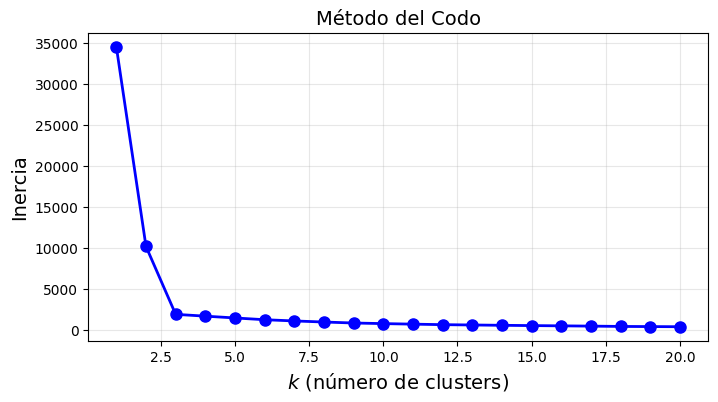

In [15]:
# ============================================
# MÉTODO DEL CODO
# ============================================
print("\n" + "="*70)
print("MÉTODO DEL CODO")
print("="*70)

kmeans_per_k = []
inertias = []

print("\nEntrenando modelos para k=1 hasta k=20...")
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10,
                    random_state=42, max_iter=300)
    kmeans.fit(X)
    kmeans_per_k.append(kmeans)
    inertias.append(kmeans.inertia_)
    print(f"k={k:2d}: Inercia = {kmeans.inertia_:.2f}")

plt.figure(figsize=(8, 4))
plt.plot(range(1, 21), inertias, "bo-", linewidth=2, markersize=8)
plt.xlabel("$k$ (número de clusters)", fontsize=14)
plt.ylabel("Inercia", fontsize=14)
plt.title("Método del Codo", fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()





SILHOUETTE SCORE

Calculando Silhouette Score para k=2 hasta k=20...
k= 2: Silhouette Score = 0.6756
k= 3: Silhouette Score = 0.7779
k= 4: Silhouette Score = 0.6047
k= 5: Silhouette Score = 0.4526
k= 6: Silhouette Score = 0.3158
k= 7: Silhouette Score = 0.3234
k= 8: Silhouette Score = 0.3262
k= 9: Silhouette Score = 0.3289
k=10: Silhouette Score = 0.3290
k=11: Silhouette Score = 0.3229
k=12: Silhouette Score = 0.3192
k=13: Silhouette Score = 0.3168
k=14: Silhouette Score = 0.3271
k=15: Silhouette Score = 0.3170
k=16: Silhouette Score = 0.3251
k=17: Silhouette Score = 0.3231
k=18: Silhouette Score = 0.3329
k=19: Silhouette Score = 0.3304
k=20: Silhouette Score = 0.3325

Mejor K encontrado: 3
Mejor Silhouette Score: 0.7779


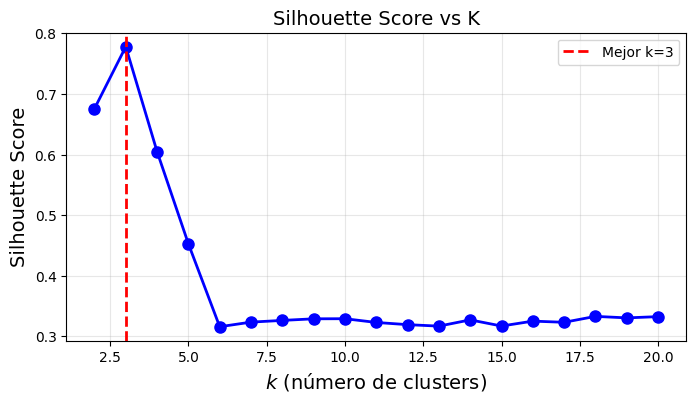

In [16]:
# ============================================
# SILHOUETTE SCORE
# ============================================
print("\n" + "="*70)
print("SILHOUETTE SCORE")
print("="*70)

silhouette_scores = []
print("\nCalculando Silhouette Score para k=2 hasta k=20...")
for k in range(2, 21):
    score = silhouette_score(X, kmeans_per_k[k-1].labels_)
    silhouette_scores.append(score)
    print(f"k={k:2d}: Silhouette Score = {score:.4f}")

best_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"\nMejor K encontrado: {best_k}")
print(f"Mejor Silhouette Score: {max(silhouette_scores):.4f}")

plt.figure(figsize=(8, 4))
plt.plot(range(2, 21), silhouette_scores, "bo-", linewidth=2, markersize=8)
plt.xlabel("$k$ (número de clusters)", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.title("Silhouette Score vs K", fontsize=14)
plt.axvline(x=best_k, color='red', linestyle='--', linewidth=2,
            label=f'Mejor k={best_k}')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()





DIAGRAMAS DE SILUETA DETALLADOS


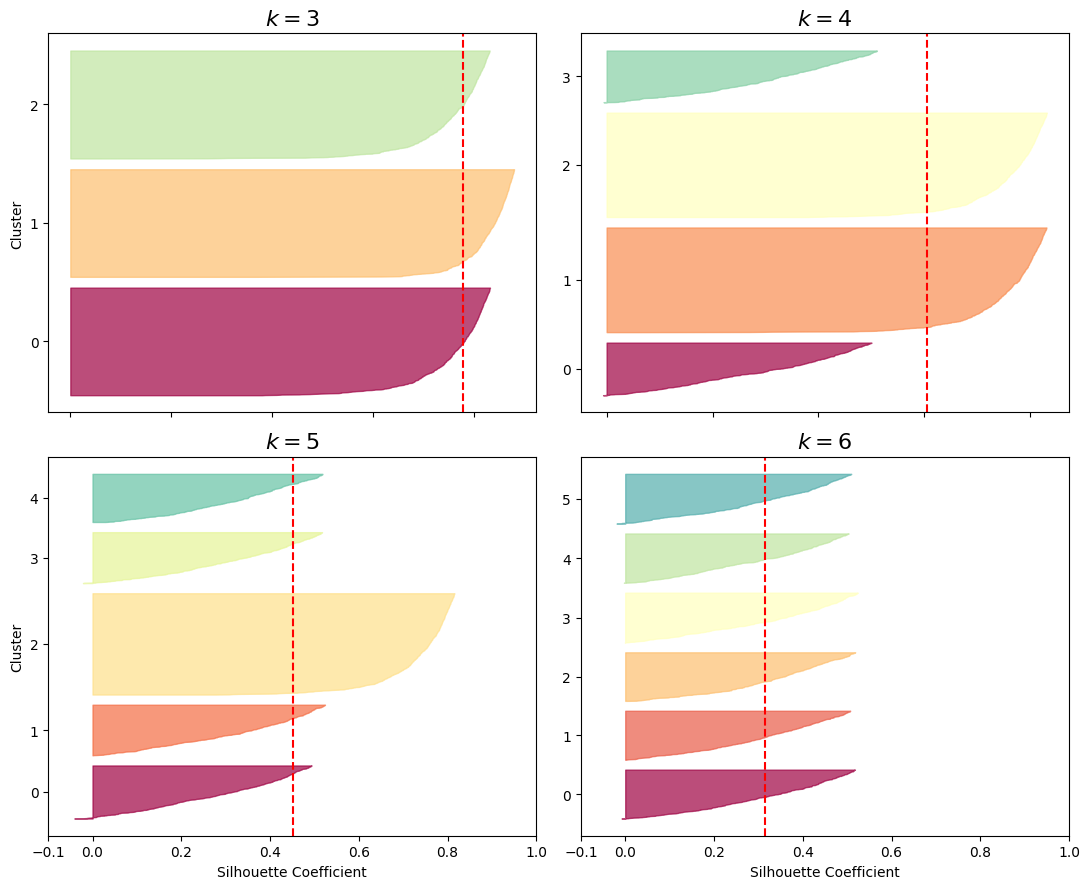

In [17]:
# ============================================
# DIAGRAMAS DE SILUETA DETALLADOS
# ============================================
print("\n" + "="*70)
print("DIAGRAMAS DE SILUETA DETALLADOS")
print("="*70)

plt.figure(figsize=(11, 9))

valid_ks = [k for k in (3, 4, 5, 6) if k <= 20]

for plot_idx, k in enumerate(valid_ks):
    plt.subplot(2, 2, plot_idx + 1)

    y_pred = kmeans_per_k[k-1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []

    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))

    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k-2], color="red", linestyle="--")
    plt.title(f"$k={k}$", fontsize=16)

plt.tight_layout()
plt.show()





VERIFICACIÓN VISUAL DE EFECTIVIDAD


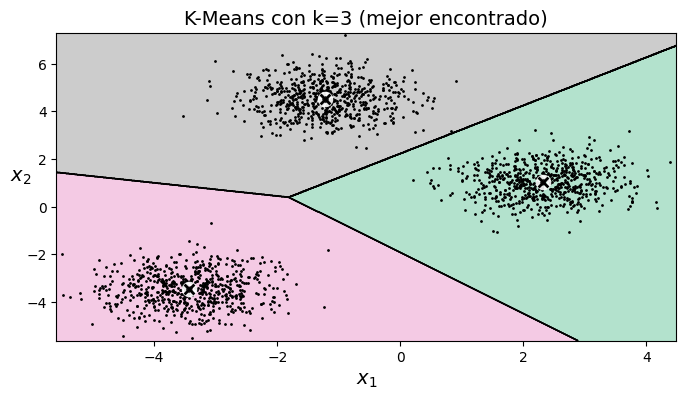


Centroides verdaderos: 3
Centroides encontrados: 3
Efectividad visual verificada


In [19]:
# ============================================
# VERIFICACIÓN VISUAL
# ============================================
print("\n" + "="*70)
print("VERIFICACIÓN VISUAL DE EFECTIVIDAD")
print("="*70)

# Entrenar con el mejor K encontrado
kmeans_best = KMeans(n_clusters=best_k, init='k-means++', n_init=10,
                     random_state=42, max_iter=300)
kmeans_best.fit(X)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_best, X)
plt.title(f"K-Means con k={best_k} (mejor encontrado)", fontsize=14)
plt.show()

print(f"\nCentroides verdaderos: {k_true}")
print(f"Centroides encontrados: {best_k}")
print(f"Efectividad visual verificada")




In [21]:
# ============================================
# RESUMEN FINAL
# ============================================
print("\n" + "="*70)
print("RESUMEN - PUNTO 1")
print("="*70)
print(f"""
GENERADOR MODIFICADO:
   - Rango K: 1-20
   - Distancia mínima entre centroides: 2.0
   - Permite verificación visual efectiva

DATASET GENERADO:
   - Centroides verdaderos: {k_true}
   - Muestras: {len(X)}
   - Características: 2D

RESULTADOS:
   - K demostración: {k_demo}
   - Mejor K encontrado: {best_k}
   - Mejor Silhouette Score: {max(silhouette_scores):.4f}

MÉTODOS APLICADOS:
   - K-Means (proceso iterativo)
   - Método del Codo (k=1-20)
   - Silhouette Score (k=2-20)
   - Diagramas de Silueta detallados
""")
print("="*70)


RESUMEN - PUNTO 1

GENERADOR MODIFICADO:
   - Rango K: 1-20
   - Distancia mínima entre centroides: 2.0
   - Permite verificación visual efectiva

DATASET GENERADO:
   - Centroides verdaderos: 3
   - Muestras: 2000
   - Características: 2D

RESULTADOS:
   - K demostración: 4
   - Mejor K encontrado: 3
   - Mejor Silhouette Score: 0.7779

MÉTODOS APLICADOS:
   - K-Means (proceso iterativo)
   - Método del Codo (k=1-20)
   - Silhouette Score (k=2-20)
   - Diagramas de Silueta detallados

